### Logistic Regression - Titanic Dataset
Titanic dataset is one of the datasets available in sklearn.
You are given:
1. A Training dataset csv file with X train and Y train data
2. A X test File and you have to predict and submit predictions for this file.
Your task is to:
1. Use Logistic Regression and come with predictions.
Read Instructions carefully -
1. Use Logistic Regression as a training algorithm and submit results predicted.
2. Files are in csv format.
3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions.
4. Your score is based on number of accurate predictions.

In [109]:
import numpy as np
import pandas as pd 

training_data=pd.read_csv('/Users/shabeggill/Downloads/0000000000002429_training_titanic_x_y_train.csv')
testing_data=pd.read_csv('/Users/shabeggill/Downloads/0000000000002429_test_titanic_x_test.csv')

x_train=training_data.drop('Survived',axis=1) #Features, removing Output column
column_names=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch' ,'Ticket', 'Fare' ,'Cabin', 'Embarked']
x_train.columns=column_names
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [110]:
y_train=training_data['Survived']
column=['Survived']
y_train.columns=column
y_train

0      1
1      0
2      0
3      0
4      0
      ..
663    1
664    0
665    1
666    0
667    1
Name: Survived, Length: 668, dtype: int64

In [111]:
#Checking Null data
x_train.isnull()
#True implies null and False implies not null

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
663,False,False,False,False,False,False,False,False,True,False
664,False,False,False,True,False,False,False,False,True,False
665,False,False,False,False,False,False,False,False,True,False
666,False,False,False,False,False,False,False,False,True,False


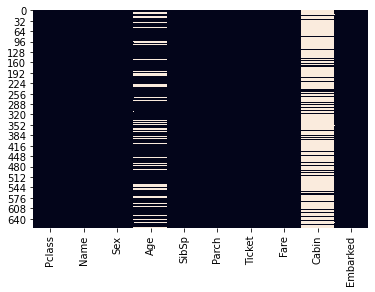

In [112]:
#Using seaborn to check on null values if any present in the features
import seaborn as sns
sns.heatmap(x_train.isnull(), cbar=False)

#As displayed below there are null values present in Age and Cabin features. There are some null values
# in Age feature while plent of null values in Cabin feature

In [113]:
#Since the null values in Age column are less, we can replace them with mean age value coressponding to each 
# Pclass

#Getting the unique values of Pclass
x_train['Pclass'].unique()

array([2, 3, 1])

In [114]:
#Getting the mean age value for each Pclass

print('Mean age for Pclass=1:',x_train[x_train.Pclass==1]['Age'].mean())

print('Mean age for Pclass=2:',x_train[x_train.Pclass==2]['Age'].mean())

print('Mean age for Pclass=3:',x_train[x_train.Pclass==3]['Age'].mean())


Mean age for Pclass=1: 37.12623188405797
Mean age for Pclass=2: 29.549492753623188
Mean age for Pclass=3: 25.839423076923076


In [115]:
def impute_missing_age(columns):

    age = columns[0]

    p_class = columns[1]

    

    if pd.isnull(age):

        if(p_class == 1):

            return x_train[x_train.Pclass==1]['Age'].mean()

        elif(p_class == 2):

            return x_train[x_train.Pclass==2]['Age'].mean()

        elif(p_class == 3):

            return x_train[x_train.Pclass==3]['Age'].mean()

        

    else:
        
        return age

#Applying this function to every row in x_train to replace missing values with the mean age value
x_train['Age'] = x_train[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)


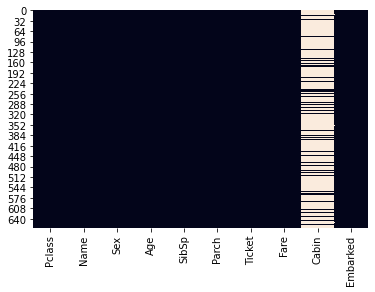

In [116]:
sns.heatmap(x_train.isnull(), cbar=False)

#as seen below the age column does not contain any null values now

In [117]:
# Removing the cabin feature as it has multiple null values
x_train.drop('Cabin',axis=1,inplace=True)

#Removing any additional columns having missing values
#x_train.dropna(inplace = True)


In [118]:
#Dealing with Categorical data
#Features such as Sex and Embarked contain Strings (Male, Female, letters) and not numerical data

#Creating dummy variables using get_dummies() method in pandas for assigning numerical value to each of the non-numerical features
pd.get_dummies(x_train['Sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
663,1,0
664,0,1
665,0,1
666,1,0


In [119]:
#We get 2 columns which reduces the predictive power. To rectify this, use 
pd.get_dummies(x_train['Sex'],drop_first=True)

,male
0,0
1,1
2,1
3,0
4,1
...,...
663,0
664,1
665,1
666,0


In [120]:
#Creating dummy variables for Sex and Embarked feature
sex_num= pd.get_dummies(x_train['Sex'], drop_first = True)

embarked_num = pd.get_dummies(x_train['Embarked'], drop_first = True)

#Adding these variables to x_train
x_train=pd.concat([x_train,sex_num,embarked_num],axis=1)

In [121]:
x_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [122]:
#Removing redundant/ unnecessary columns from the dataset

#We now drop the original Sex and Embarked columns from the DataFrame. 
#Name,PassengerId, Ticket are not predictive of Titanic crash survival rates and hence 
#have nothing to do with survival, so we remove these as well

x_train.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,29.000000,1,0,26.0000,0,0,1
1,3,25.839423,0,0,8.0500,1,0,1
2,2,39.000000,0,0,26.0000,1,0,1
3,3,29.000000,0,4,21.0750,0,0,1
4,3,25.000000,0,0,7.0500,1,0,1
...,...,...,...,...,...,...,...,...
663,2,17.000000,0,0,10.5000,0,0,1
664,3,25.839423,0,0,7.7500,1,1,0
665,3,32.000000,0,0,56.4958,1,0,1
666,3,22.000000,0,0,9.8375,0,0,1


In [123]:
#Repeating the above process wrt features for testing data as well

x_test=testing_data

#Getting the mean age value for each Pclass

print('Mean age for Pclass=1:',x_test[x_test.Pclass==1]['Age'].mean())

print('Mean age for Pclass=2:',x_test[x_test.Pclass==2]['Age'].mean())

print('Mean age for Pclass=3:',x_test[x_test.Pclass==3]['Age'].mean())


Mean age for Pclass=1: 41.416666666666664
Mean age for Pclass=2: 31.17142857142857
Mean age for Pclass=3: 23.228105263157897


In [124]:
#Applying the impute_missing_age function to every row in x_test to replace missing values with the mean age value
x_test['Age'] = x_test[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

In [125]:
# Removing the cabin feature as it has multiple null values
x_test.drop('Cabin',axis=1,inplace=True)

In [126]:
#Creating dummy variables for Sex and Embarked feature
sex_num_test= pd.get_dummies(x_test['Sex'], drop_first = True)

embarked_num_test = pd.get_dummies(x_test['Embarked'], drop_first = True)

#Adding these variables to x_test
x_test=pd.concat([x_test,sex_num_test,embarked_num_test],axis=1)

In [127]:
#Removing redundant/ unnecessary columns from the dataset

#We now drop the original Sex and Embarked columns from the DataFrame. 
#Name,PassengerId, Ticket are not predictive of Titanic crash survival rates and hence 
#have nothing to do with survival, so we remove these as well

x_test.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.000000,1,1,36.7500,1,0,1
1,1,49.000000,0,0,25.9292,0,0,1
2,3,25.839423,0,0,7.7375,1,1,0
3,2,24.000000,2,1,27.0000,0,0,1
4,1,36.000000,0,0,26.2875,1,0,1
...,...,...,...,...,...,...,...,...
218,3,20.000000,1,0,7.9250,1,0,1
219,1,45.000000,0,0,26.5500,1,0,1
220,1,17.000000,1,0,108.9000,0,0,0
221,3,43.000000,0,0,6.4500,1,0,1


In [128]:
#Adding new features in x_train
for i in x_train.iloc[:,:8]:
    for j in x_train.iloc[:,:8]:
        x_train[i+'_'+j] = x_train[i].astype('float') * x_train[j].astype('float')
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Pclass_Pclass,Pclass_Age,...,Q_Q,Q_S,S_Pclass,S_Age,S_SibSp,S_Parch,S_Fare,S_male,S_Q,S_S
0,2,29.000000,1,0,26.0000,0,0,1,4.0,58.000000,...,0.0,0.0,2.0,29.000000,1.0,0.0,26.0000,0.0,0.0,1.0
1,3,25.839423,0,0,8.0500,1,0,1,9.0,77.518269,...,0.0,0.0,3.0,25.839423,0.0,0.0,8.0500,1.0,0.0,1.0
2,2,39.000000,0,0,26.0000,1,0,1,4.0,78.000000,...,0.0,0.0,2.0,39.000000,0.0,0.0,26.0000,1.0,0.0,1.0
3,3,29.000000,0,4,21.0750,0,0,1,9.0,87.000000,...,0.0,0.0,3.0,29.000000,0.0,4.0,21.0750,0.0,0.0,1.0
4,3,25.000000,0,0,7.0500,1,0,1,9.0,75.000000,...,0.0,0.0,3.0,25.000000,0.0,0.0,7.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2,17.000000,0,0,10.5000,0,0,1,4.0,34.000000,...,0.0,0.0,2.0,17.000000,0.0,0.0,10.5000,0.0,0.0,1.0
664,3,25.839423,0,0,7.7500,1,1,0,9.0,77.518269,...,1.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0
665,3,32.000000,0,0,56.4958,1,0,1,9.0,96.000000,...,0.0,0.0,3.0,32.000000,0.0,0.0,56.4958,1.0,0.0,1.0
666,3,22.000000,0,0,9.8375,0,0,1,9.0,66.000000,...,0.0,0.0,3.0,22.000000,0.0,0.0,9.8375,0.0,0.0,1.0


In [129]:
#Adding new features in x_test
for i in x_test.iloc[:,:8]:
    for j in x_test.iloc[:,:8]:
        x_test[i+'_'+j] = x_test[i].astype('float') * x_test[j].astype('float')
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Pclass_Pclass,Pclass_Age,...,Q_Q,Q_S,S_Pclass,S_Age,S_SibSp,S_Parch,S_Fare,S_male,S_Q,S_S
0,2,8.000000,1,1,36.7500,1,0,1,4.0,16.000000,...,0.0,0.0,2.0,8.0,1.0,1.0,36.7500,1.0,0.0,1.0
1,1,49.000000,0,0,25.9292,0,0,1,1.0,49.000000,...,0.0,0.0,1.0,49.0,0.0,0.0,25.9292,0.0,0.0,1.0
2,3,25.839423,0,0,7.7375,1,1,0,9.0,77.518269,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,2,24.000000,2,1,27.0000,0,0,1,4.0,48.000000,...,0.0,0.0,2.0,24.0,2.0,1.0,27.0000,0.0,0.0,1.0
4,1,36.000000,0,0,26.2875,1,0,1,1.0,36.000000,...,0.0,0.0,1.0,36.0,0.0,0.0,26.2875,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,3,20.000000,1,0,7.9250,1,0,1,9.0,60.000000,...,0.0,0.0,3.0,20.0,1.0,0.0,7.9250,1.0,0.0,1.0
219,1,45.000000,0,0,26.5500,1,0,1,1.0,45.000000,...,0.0,0.0,1.0,45.0,0.0,0.0,26.5500,1.0,0.0,1.0
220,1,17.000000,1,0,108.9000,0,0,0,1.0,17.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
221,3,43.000000,0,0,6.4500,1,0,1,9.0,129.000000,...,0.0,0.0,3.0,43.0,0.0,0.0,6.4500,1.0,0.0,1.0


In [130]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)
X_train_scaled=scaler.transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [131]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(max_iter=3000)
clf.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=3000)

In [132]:
y_pred=clf.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0])

In [133]:
len(y_pred)

223

In [134]:
clf.predict(X_train_scaled) -y_train#Ypred - Ytrue


0      0
1      0
2      0
3      0
4      0
      ..
663    0
664    0
665   -1
666    1
667    0
Name: Survived, Length: 668, dtype: int64

In [135]:
#Now if I want to see the actual hypothesis values. This function will give the probabilities for each point
#that you want to test for
clf.predict_proba(X_train_scaled)

#This gives me an array of array where each point is the probability that this point belongs to zero and this
#point belongs to 1

array([[0.13221623, 0.86778377],
       [0.88464157, 0.11535843],
       [0.83507122, 0.16492878],
       ...,
       [0.83213598, 0.16786402],
       [0.44963008, 0.55036992],
       [0.0473885 , 0.9526115 ]])

In [136]:
np.savetxt('PredictionsForTitanicDataset.csv',y_pred,delimiter=',',fmt='%.0f')